In [1]:
# Block 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


In [2]:
# Block 2: Load the dataset
# Sample EV adoption dataset (can replace with real one)
data = {
    'Country': ['USA', 'China', 'Norway', 'Germany', 'UK', 'India', 'France', 'Canada', 'Netherlands', 'Japan'],
    'EV_Sales_2020': [330000, 1300000, 105000, 194000, 175000, 22000, 111000, 54000, 90000, 56000],
    'EV_Sales_2021': [607000, 3200000, 153000, 355000, 310000, 48000, 165000, 94000, 115000, 87000],
    'EV_Sales_2022': [918000, 6800000, 174000, 475000, 420000, 90000, 200000, 123000, 130000, 110000],
}
df = pd.DataFrame(data)
df


,Country,EV_Sales_2020,EV_Sales_2021,EV_Sales_2022
0,USA,330000,607000,918000
1,China,1300000,3200000,6800000
2,Norway,105000,153000,174000
3,Germany,194000,355000,475000
4,UK,175000,310000,420000
5,India,22000,48000,90000
6,France,111000,165000,200000
7,Canada,54000,94000,123000
8,Netherlands,90000,115000,130000
9,Japan,56000,87000,110000


In [3]:
# Block 3: Calculate Growth Rate
df["Growth_2020_2021"] = ((df["EV_Sales_2021"] - df["EV_Sales_2020"]) / df["EV_Sales_2020"]) * 100
df["Growth_2021_2022"] = ((df["EV_Sales_2022"] - df["EV_Sales_2021"]) / df["EV_Sales_2021"]) * 100
df.round(2)


,Country,EV_Sales_2020,EV_Sales_2021,EV_Sales_2022,Growth_2020_2021,Growth_2021_2022
0,USA,330000,607000,918000,83.94,51.24
1,China,1300000,3200000,6800000,146.15,112.50
2,Norway,105000,153000,174000,45.71,13.73
3,Germany,194000,355000,475000,82.99,33.80
4,UK,175000,310000,420000,77.14,35.48
5,India,22000,48000,90000,118.18,87.50
6,France,111000,165000,200000,48.65,21.21
7,Canada,54000,94000,123000,74.07,30.85
8,Netherlands,90000,115000,130000,27.78,13.04
9,Japan,56000,87000,110000,55.36,26.44


C:\Users\HP\AppData\Local\Temp\ipykernel_11660\3378219073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="EV_Sales_2022", y="Country", data=df, palette="viridis")


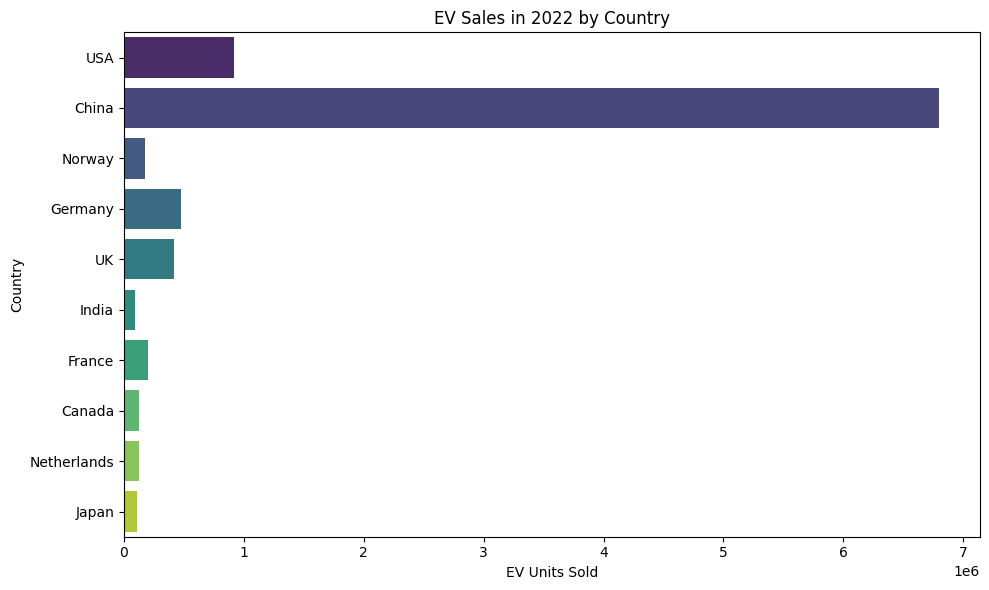

In [4]:
# Block 4: Bar chart - 2022 EV Sales by Country
plt.figure(figsize=(10,6))
sns.barplot(x="EV_Sales_2022", y="Country", data=df, palette="viridis")
plt.title("EV Sales in 2022 by Country")
plt.xlabel("EV Units Sold")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


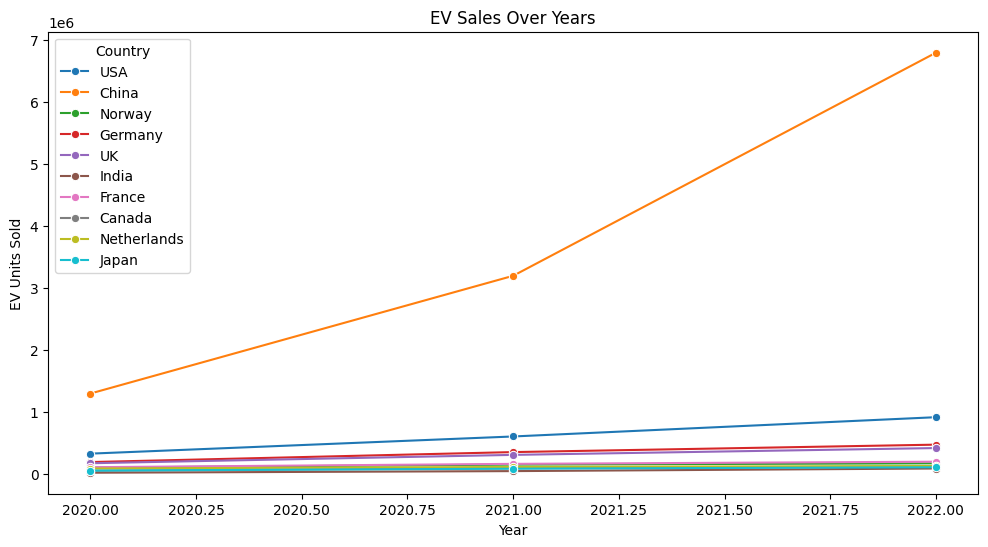

In [6]:
# Block 5: Line plot - Year-wise EV sales
df_long = pd.melt(df, id_vars=['Country'], value_vars=['EV_Sales_2020', 'EV_Sales_2021', 'EV_Sales_2022'],
                  var_name='Year', value_name='EV_Sales')
df_long['Year'] = df_long['Year'].str.extract(r'(\d+)')  # <-- fixed here
df_long['Year'] = df_long['Year'].astype(int)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_long, x='Year', y='EV_Sales', hue='Country', marker='o')
plt.title("EV Sales Over Years")
plt.ylabel("EV Units Sold")
plt.show()


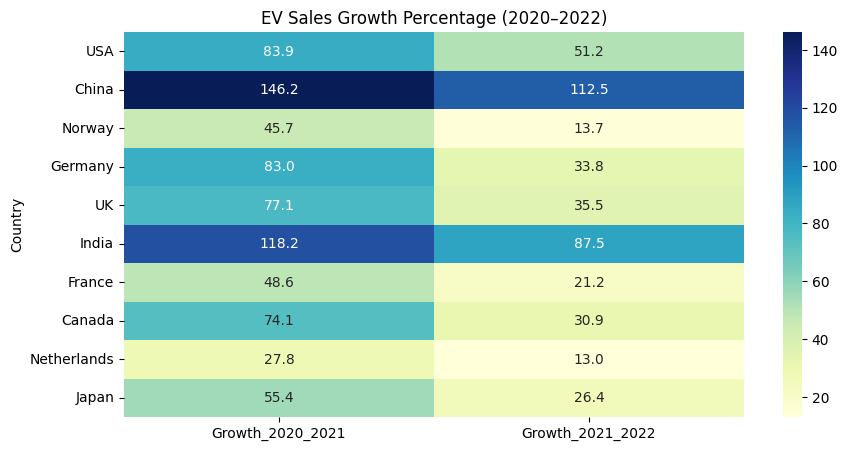

In [7]:
# Block 6: Heatmap for growth percentages
growth_data = df[["Country", "Growth_2020_2021", "Growth_2021_2022"]].set_index("Country")
plt.figure(figsize=(10,5))
sns.heatmap(growth_data, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("EV Sales Growth Percentage (2020–2022)")
plt.show()


In [8]:
# Block 7: Top 5 countries by 2022 EV sales
top5 = df.sort_values(by="EV_Sales_2022", ascending=False).head(5)
top5[['Country', 'EV_Sales_2022']]


,Country,EV_Sales_2022
1,China,6800000
0,USA,918000
3,Germany,475000
4,UK,420000
6,France,200000


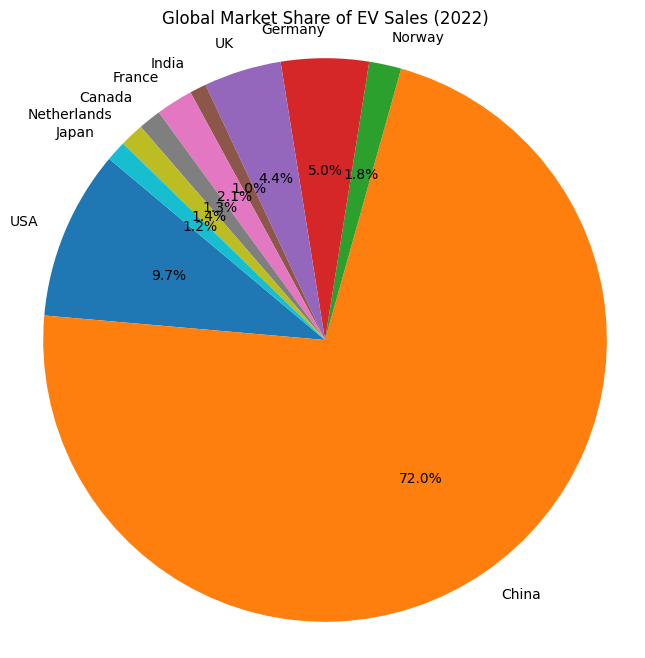

In [9]:
# Block 8: Pie chart of market share (2022)
plt.figure(figsize=(8,8))
plt.pie(df["EV_Sales_2022"], labels=df["Country"], autopct='%1.1f%%', startangle=140)
plt.title("Global Market Share of EV Sales (2022)")
plt.axis('equal')
plt.show()


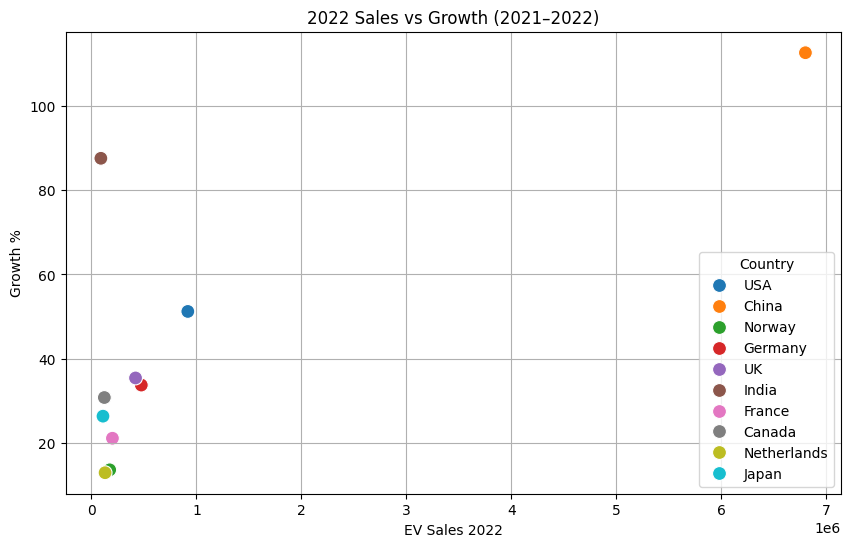

In [10]:
# Block 9: Scatter plot - 2022 vs Growth
plt.figure(figsize=(10,6))
sns.scatterplot(x="EV_Sales_2022", y="Growth_2021_2022", data=df, hue="Country", s=100)
plt.title("2022 Sales vs Growth (2021–2022)")
plt.xlabel("EV Sales 2022")
plt.ylabel("Growth %")
plt.grid(True)
plt.show()


In [17]:
# Block 10: Interactive Plotly bar chart
fig = px.bar(df, x='Country', y=['EV_Sales_2020', 'EV_Sales_2021', 'EV_Sales_2022'],
             title='EV Sales by Country (2020–2022)', barmode='group')
fig.show()


In [12]:
# Block 11: Add average sales column
df["Average_Sales"] = df[["EV_Sales_2020", "EV_Sales_2021", "EV_Sales_2022"]].mean(axis=1).astype(int)
df[["Country", "Average_Sales"]]


,Country,Average_Sales
0,USA,618333
1,China,3766666
2,Norway,144000
3,Germany,341333
4,UK,301666
5,India,53333
6,France,158666
7,Canada,90333
8,Netherlands,111666
9,Japan,84333


In [13]:
# Block 12: Highlight countries with below-average growth
threshold = df["Growth_2021_2022"].mean()
below_avg = df[df["Growth_2021_2022"] < threshold]
below_avg[["Country", "Growth_2021_2022"]]


,Country,Growth_2021_2022
2,Norway,13.725490
3,Germany,33.802817
4,UK,35.483871
6,France,21.212121
7,Canada,30.851064
8,Netherlands,13.043478
9,Japan,26.436782


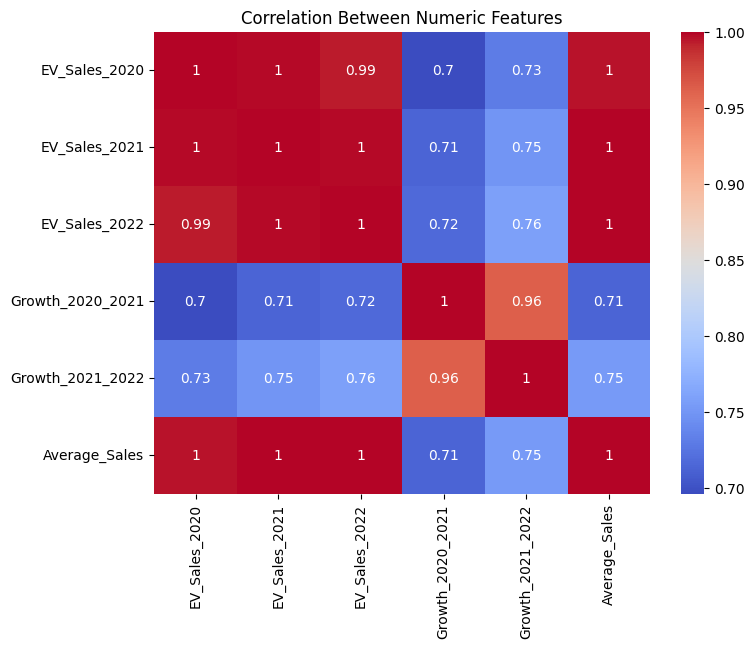

In [14]:
# Block 13: Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()


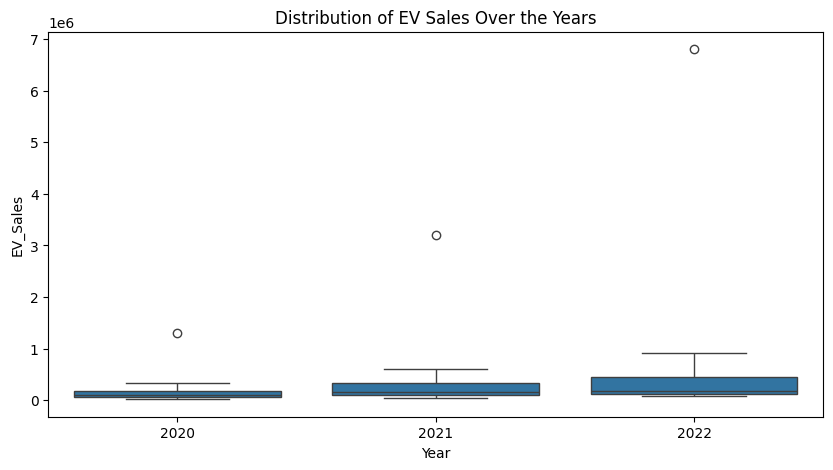

In [15]:
# Block 14: Boxplot of sales over years
plt.figure(figsize=(10,5))
sns.boxplot(data=df_long, x="Year", y="EV_Sales")
plt.title("Distribution of EV Sales Over the Years")
plt.show()


In [16]:
# Block 15: Save results to CSV
df.to_csv("ev_sales_analysis.csv", index=False)
print("Data saved to ev_sales_analysis.csv")


Data saved to ev_sales_analysis.csv
